<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Deep_Convolutional_Generative_Adversarial_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Ref: https://www.tensorflow.org/tutorials/generative/dcgan
# https://pyimagesearch.com/2021/11/11/get-started-dcgan-for-fashion-mnist/

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
! pip install imageio

In [4]:
! pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-41j1qfas
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-41j1qfas
  Resolved https://github.com/tensorflow/docs to commit 7442d72c60d0868f94a384331305c0e3889097a8
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.9.4.19335-py3-none-any.whl size=184104 sha256=bbd15aca41632799a3d17ed7236398a588270927313bafb18f7baf69751f2224
  Stored in directory: /tmp/pip-ephem-wheel-cache-_8qhhlxe/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [49]:
display.Image(url='https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/12/2_strided_conv_do_not_smush.gif?size=395x381&lossy=2&strip=1&webp=1')


In [50]:
display.Image(url='https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/12/3_fractional_strided_conv_do_not_smush.gif?size=395x449&lossy=2&strip=1&webp=1')

In [6]:
import glob
import numpy
import imageio
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [ ]:
help(tf.keras.datasets.mnist.load_data)

In [7]:
(train_images, train_labels) , (_,_) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
train_images.shape  # (60000, 28, 28)

(60000, 28, 28)

In [10]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1).astype('float32')

In [11]:
train_images = (train_images - 127.5)/127.5

In [15]:
train_images.min() ; train_images.max()

1.0

In [16]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [18]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

See [here](https://pyimagesearch.com/2021/11/11/get-started-dcgan-for-fashion-mnist/)<br>
And [here](https://blog.paperspace.com/transpose-convolution/)

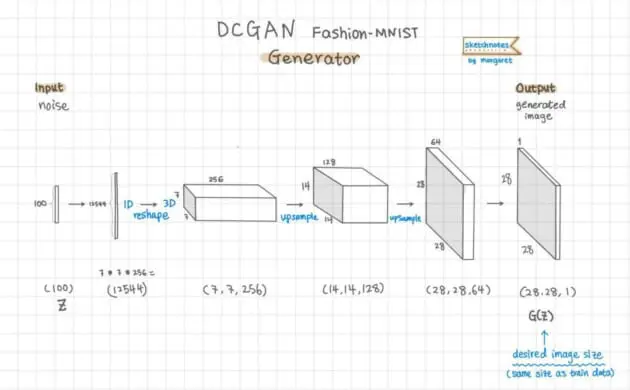

In [21]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [22]:
generator = make_generator_model()


In [23]:
noise = tf.random.normal([1, 100])

In [25]:
noise.shape
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.80387   , -1.0447533 , -0.23766175,  0.3296462 ,  0.21170445,
        -0.90515   , -1.0365559 ,  0.32690817, -1.7327358 ,  1.451928  ,
        -0.02226721, -0.01504105, -0.7440926 , -0.1978643 ,  0.68109655,
        -0.2774652 ,  0.64537746,  0.08460229,  0.90108883,  0.33450943,
        -0.32873482, -0.5585749 , -0.35892463,  0.93929964, -0.684093  ,
         1.9983989 ,  0.12247272,  0.02611022,  0.42397782, -0.7858856 ,
        -0.10205368,  1.2266313 , -0.5700274 , -0.05394765,  1.2086146 ,
         0.18217787,  0.6021991 ,  0.24273503,  0.54722637, -0.92205375,
        -1.0501418 ,  0.8802923 , -1.1509312 ,  0.41257203, -0.20994332,
         0.50701696, -0.8503777 , -0.4925733 ,  0.86218214, -1.0495583 ,
         1.1522244 , -0.7898002 , -0.33004227, -0.42414674, -0.6298562 ,
         1.4166293 ,  0.91766393,  0.7644683 ,  0.4746776 , -0.48681012,
        -0.8385827 ,  0.04431652,  0.6834078 , -1.303312  ,  0.32622162,
 

In [29]:
noise = tf.random.normal([1, 16])
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))


In [31]:
model(noise, training = False)  # As there is no feedback. Remember all layers are functions

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-0.20449169, -0.2046958 ,  1.6654122 , -0.03676227, -1.19018   ,
         1.4938701 ,  2.389235  ,  0.8159925 ]], dtype=float32)>

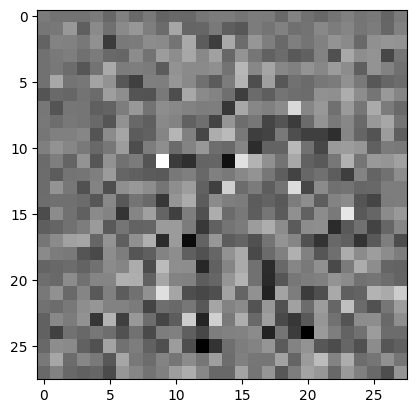

In [32]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

Discriminator

In [33]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [34]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00154053]], shape=(1, 1), dtype=float32)


In [38]:
# This method returns a helper function to compute cross entropy loss
# from_logits	Whether to interpret y_pred as a tensor of logit values.
#  By default, we assume that y_pred contains probabilities (i.e., values in [0, 1]).

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [39]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [40]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [41]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [42]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)